In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('googleplaystore.csv')

In [7]:
# Первые 5 строк датасета
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
# Размер датасета - 10841 строк, 13 колонок
df.shape

(10841, 13)

In [9]:
# Список колонок
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
# Предположу, что данные версии андроида, обновления и версии нас мало интерисуют, удалим эти столбцы
# удаление столбца
df = df.drop('Android Ver', axis=1)
df = df.drop('Current Ver', axis=1)
df = df.drop('Last Updated', axis=1)



# сохранение изменений в исходном файле
#df.to_csv('dataset.csv', index=False)

In [11]:
df.columns # Другое дело!

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres'],
      dtype='object')

In [12]:
# Список колонок с типами данных
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

In [13]:
# Как видно, столбец Reviews и прочие имеют тип object, хотя в них числовые значения
# Уберем букву "M", которая обозначает миллион или мегабайт, чтобы остались сухие числа

# удаление строк, содержащих "Varies with device"
df = df[df['Size'] != 'Varies with device']
df = df[df['Price'] != 'Everyone']

# сохранение изменений в исходном файле
#df.to_csv('dataset.csv', index=False)


if df['Size'].dtypes == 'object':
    df['Size'] = df['Size'].str.replace('M', '')
    df['Size'] = df['Size'].str.replace('k', '')
    df['Size'] = df['Size'].str.replace('+', '')
    df['Size'] = df['Size'].str.replace(',', '.')
    df['Size'] = df['Size'].astype(float)

if df['Reviews'].dtypes == 'object':
    df['Reviews'] = df['Reviews'].str.replace('M', '')
    df['Reviews'] = df['Reviews'].astype(int)

if df['Price'].dtypes == 'object':
    df['Price'] = df['Price'].str.replace('$', '')
    df['Price'] = df['Price'].astype(float)
    
if df['Installs'].dtypes == 'object':
    df['Installs'] = df['Installs'].str.replace('M', '')
    df['Installs'] = df['Installs'].str.replace('+', '')
    df['Installs'] = df['Installs'].str.replace(',', '')
    df['Installs'] = df['Installs'].astype(int) # значения в этой колонке слишком большие для float, да и не за чем он тут

if df['Type'].dtypes == 'object':
    df['Type'] = df['Type'].str.replace('Free', 'True') # => True будет значить, что приложение бесплатное 
    df['Type'] = df['Type'].str.replace('Paid', 'False') # => False будет значить, что приложение платное
    df['Type'] = df['Type'].astype(bool)
    

In [14]:
df.dtypes


App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type                 bool
Price             float64
Content Rating     object
Genres             object
dtype: object

In [15]:
df.head(5) # Совсем другое дело! 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,True,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,True,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,True,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,True,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,True,0.0,Everyone,Art & Design;Creativity


In [16]:
# Осталось убрать строки с пустыми значениями и дубликаты
df.isna().sum()

App                  0
Category             0
Rating            1416
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

In [17]:
df = df.dropna()
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [18]:
# 307 дубликатов
df.duplicated().sum()

307

In [19]:
df = df.drop_duplicates()
df.duplicated().sum()
# очистили датасет, теперь он готов для построения графиков

0

In [20]:
# Основные статистические характеристки набора данных
df.describe()

,Rating,Reviews,Size,Installs,Price
count,7422.000000,7.422000e+03,7422.000000,7.422000e+03,7422.000000
mean,4.171315,2.788218e+05,37.574724,7.823331e+06,1.116900
std,0.549803,1.743854e+06,94.975345,4.631033e+07,17.710942
min,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000
25%,4.000000,9.900000e+01,5.900000,1.000000e+04,0.000000
50%,4.300000,2.066500e+03,16.000000,1.000000e+05,0.000000
75%,4.500000,3.687425e+04,37.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,994.000000,1.000000e+09,400.000000


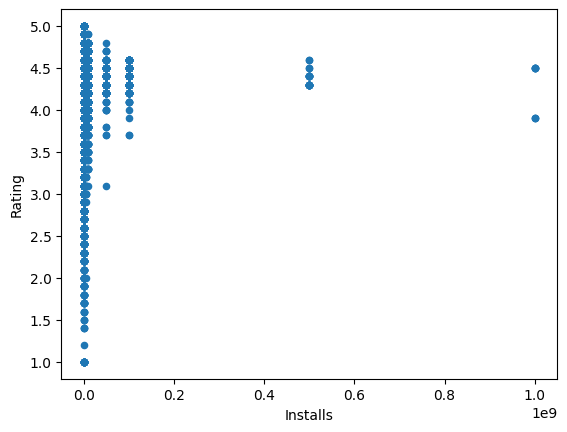

In [21]:
# построение диаграммы рассеяния
df.plot.scatter(x='Installs', y='Rating')

# отображение диаграммы
plt.show()

# По этой диаграмме видно, что плохой рейтинг свойственнен приложениям, которые мало скачивают

C:\Users\mesou\AppData\Local\Temp\ipykernel_1012\3393766832.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

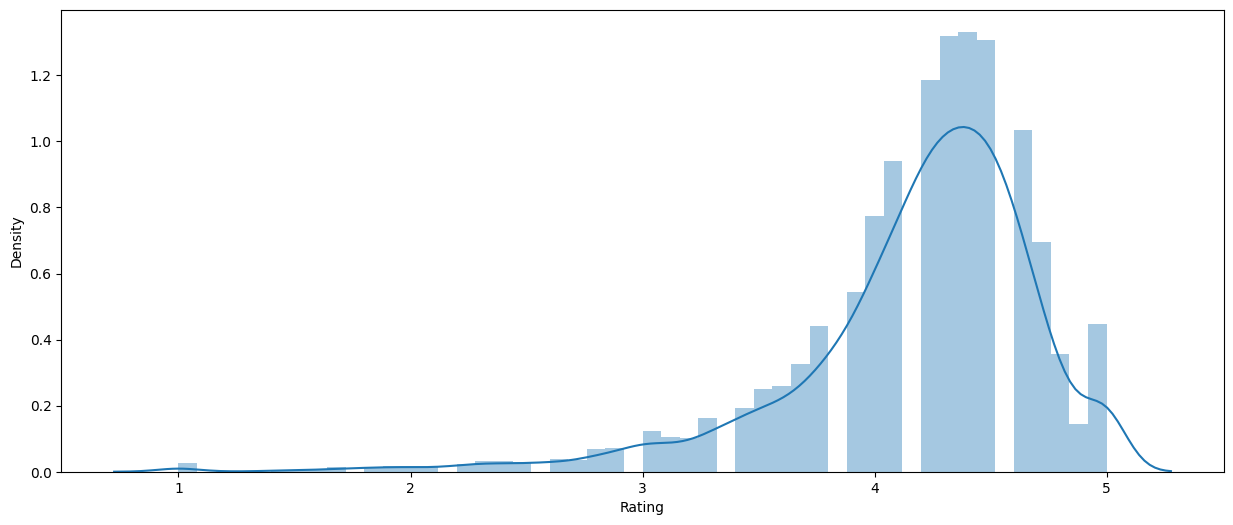

In [22]:
# Гистограмма
# Позволяет оценить плотность вероятности распределения данных.
fig, ax = plt.subplots(figsize=(15,6)) 
sns.distplot(df['Rating'])

In [23]:
# fig, ax = plt.subplots(figsize=(15,6))
# sns.distplot(df.loc[df['Type'] == True]['Rating'])
# sns.distplot(df.loc[df['Type'] == False]['Rating'])
# plt.show()

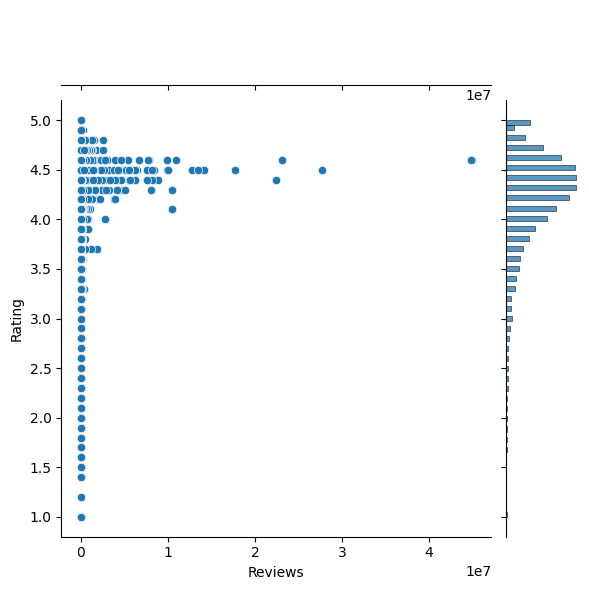

In [24]:
# Jointplot
# Комбинация гистограмм и диаграмм рассеивания. В данном случае это зависимость рейтинга от кол-ва отзывов
sns.jointplot(x='Reviews', y='Rating', data=df)

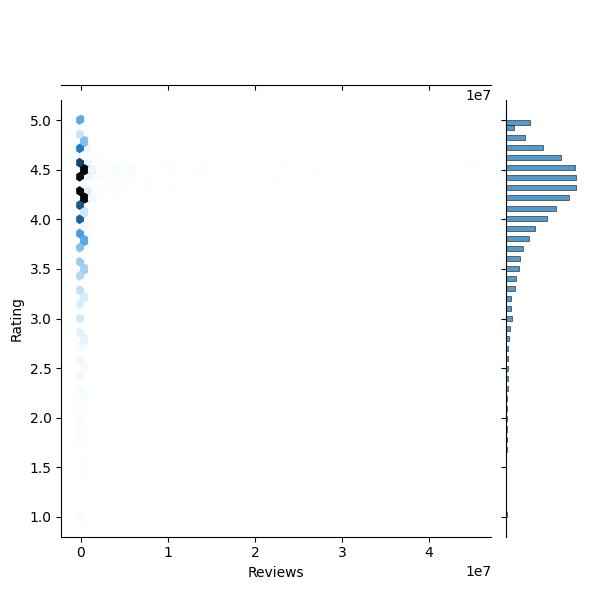

In [25]:
sns.jointplot(x='Reviews', y='Rating', data=df, kind="hex")

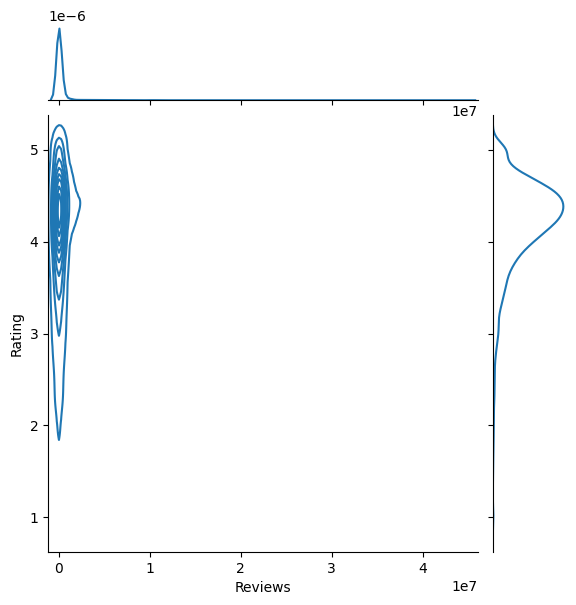

In [26]:
sns.jointplot(x='Reviews', y='Rating', data=df, kind="kde")

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


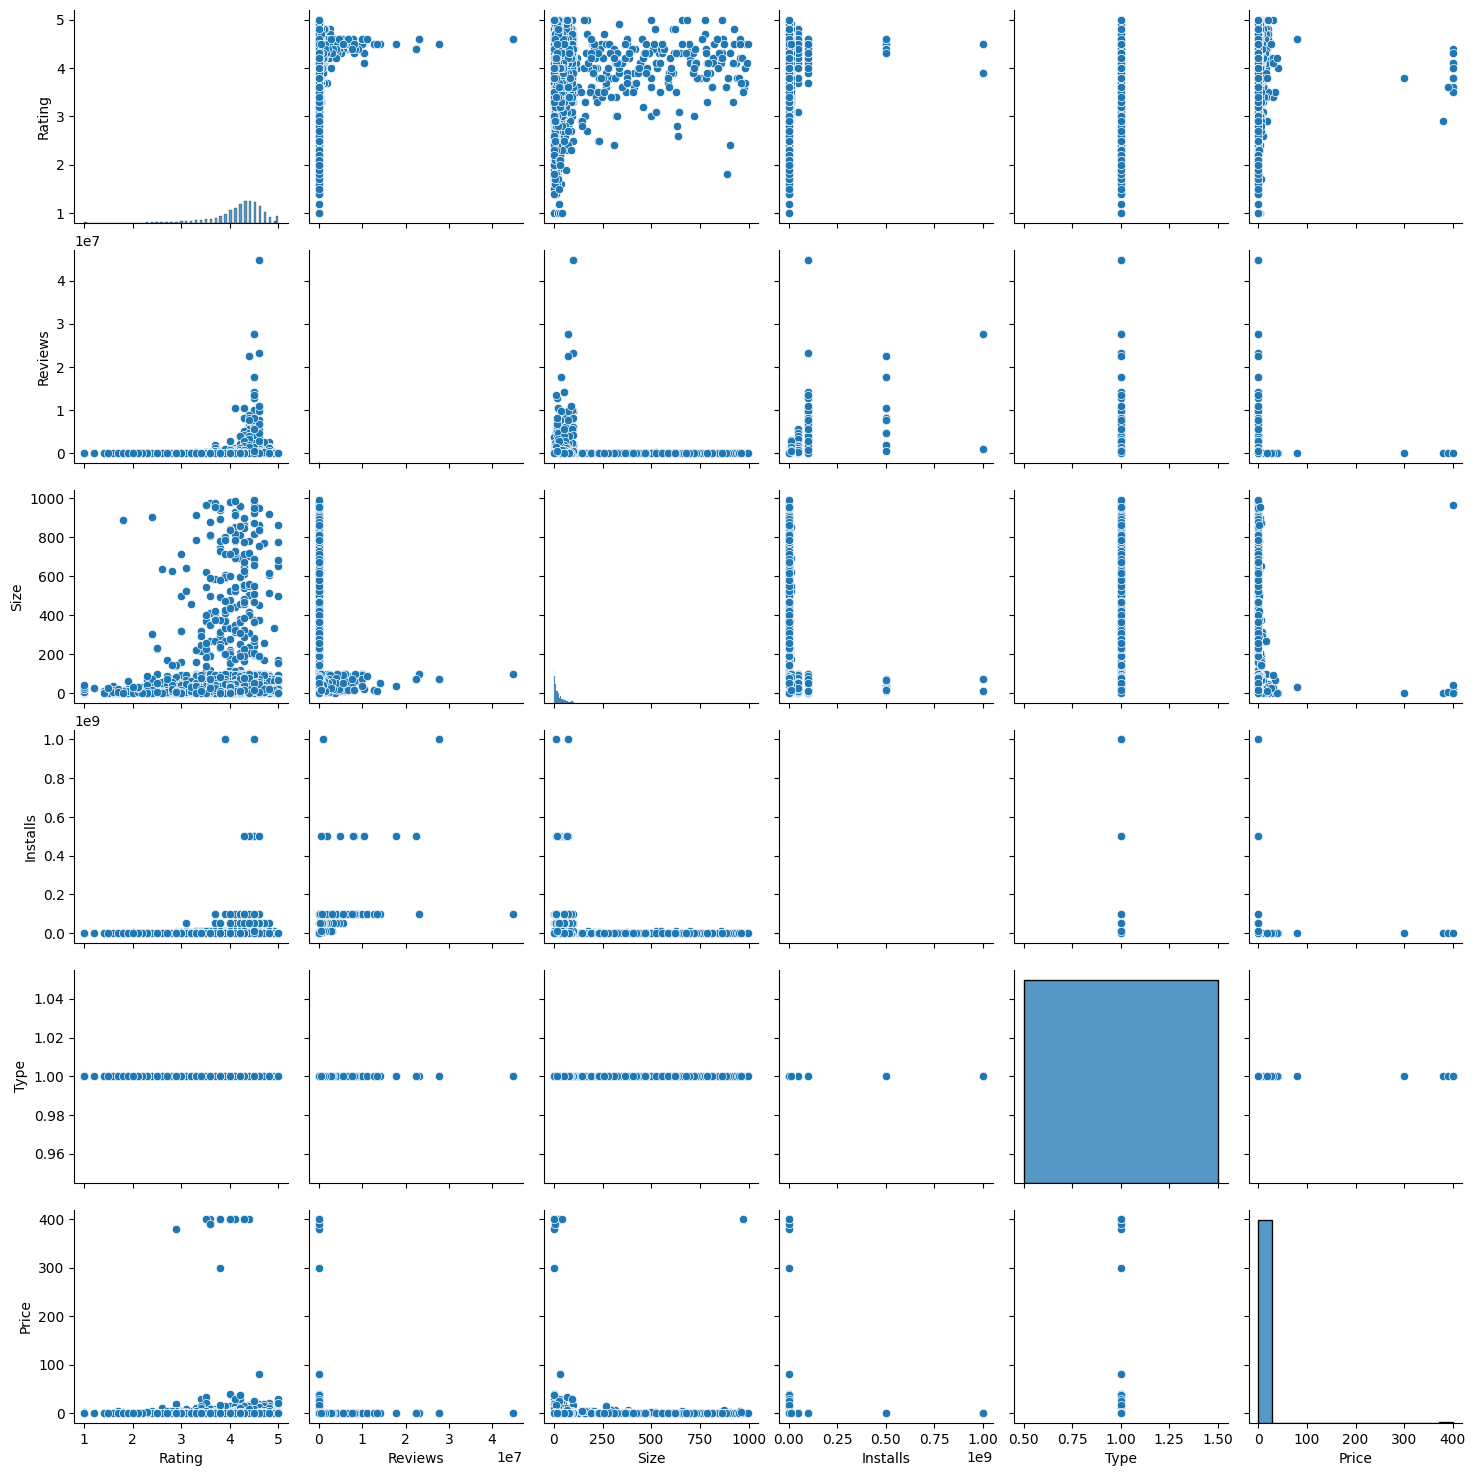

In [27]:
sns.pairplot(df)

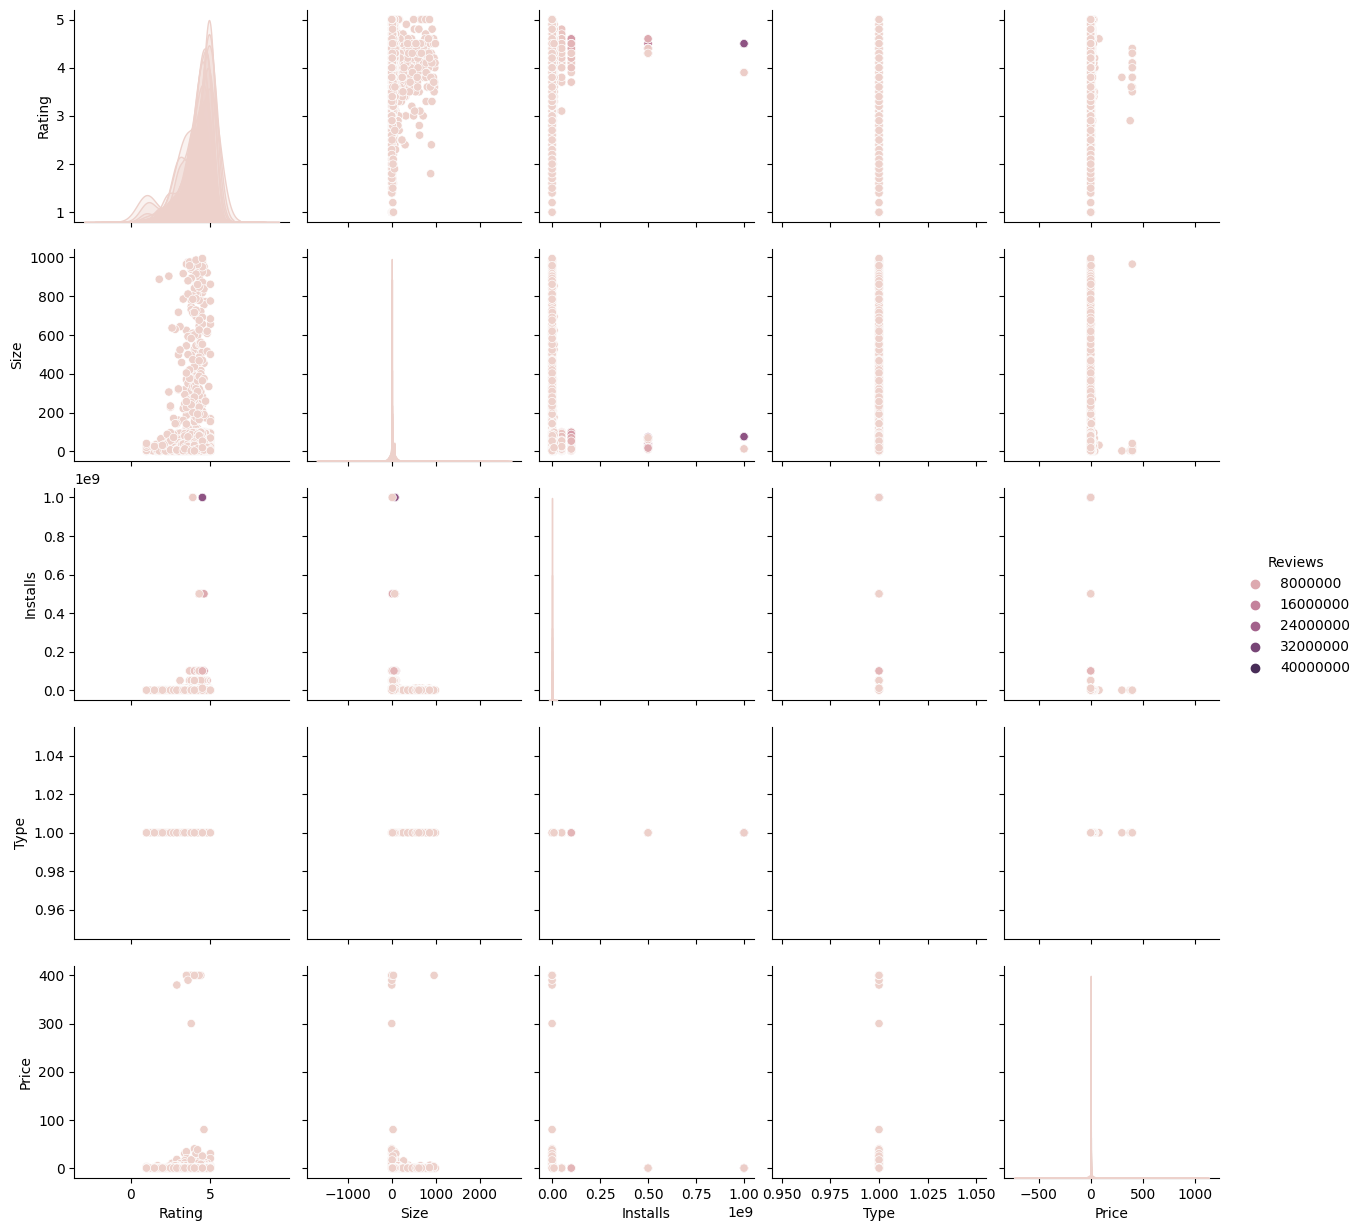

In [28]:
sns.pairplot(df, hue="Reviews")

<Axes: xlabel='Reviews'>

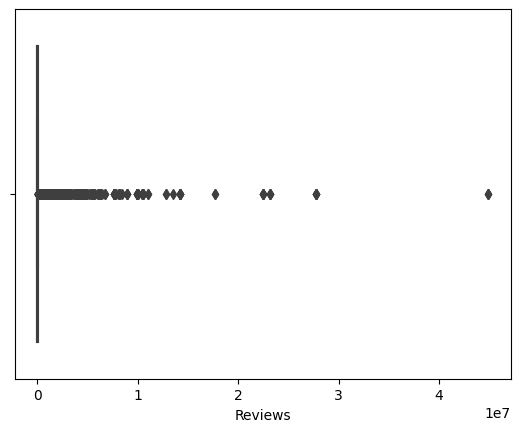

In [29]:
sns.boxplot(x=df['Reviews'])

<Axes: ylabel='Reviews'>

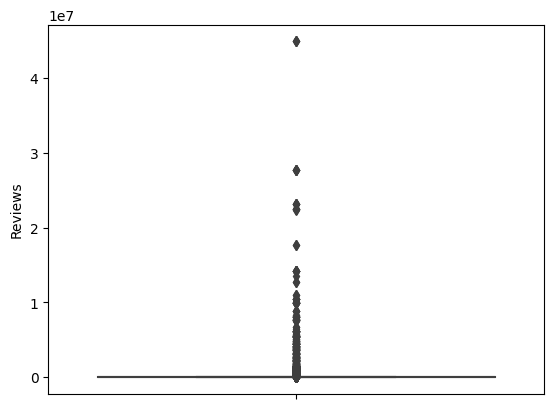

In [30]:
# По вертикали
sns.boxplot(y=df['Reviews'])

<Axes: xlabel='Rating', ylabel='Reviews'>

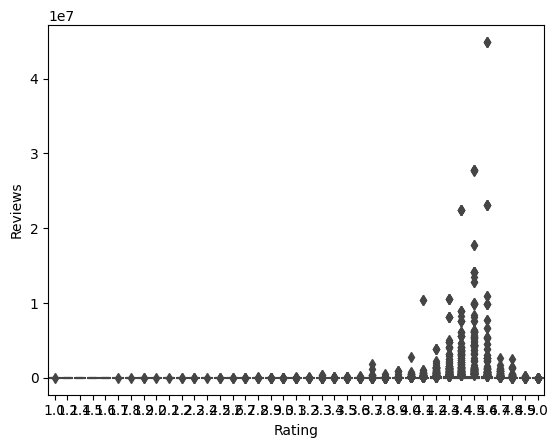

In [31]:
# Распределение параметра Y сгруппированные по Rating.
sns.boxplot(x='Rating', y='Reviews', data=df)

<Axes: xlabel='Reviews'>

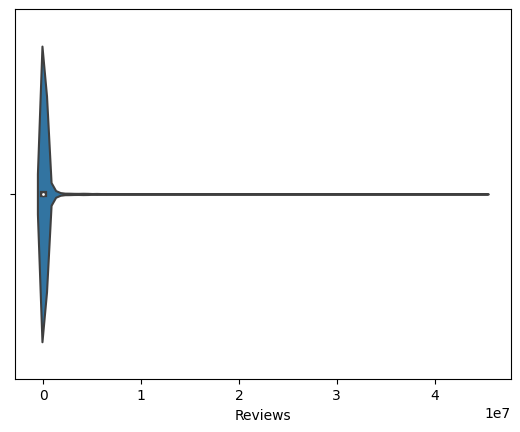

In [32]:
sns.violinplot(x=df['Reviews'])

C:\Users\mesou\AppData\Local\Temp\ipykernel_1012\2737388054.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Reviews'], ax=ax[1])


<Axes: xlabel='Reviews', ylabel='Density'>

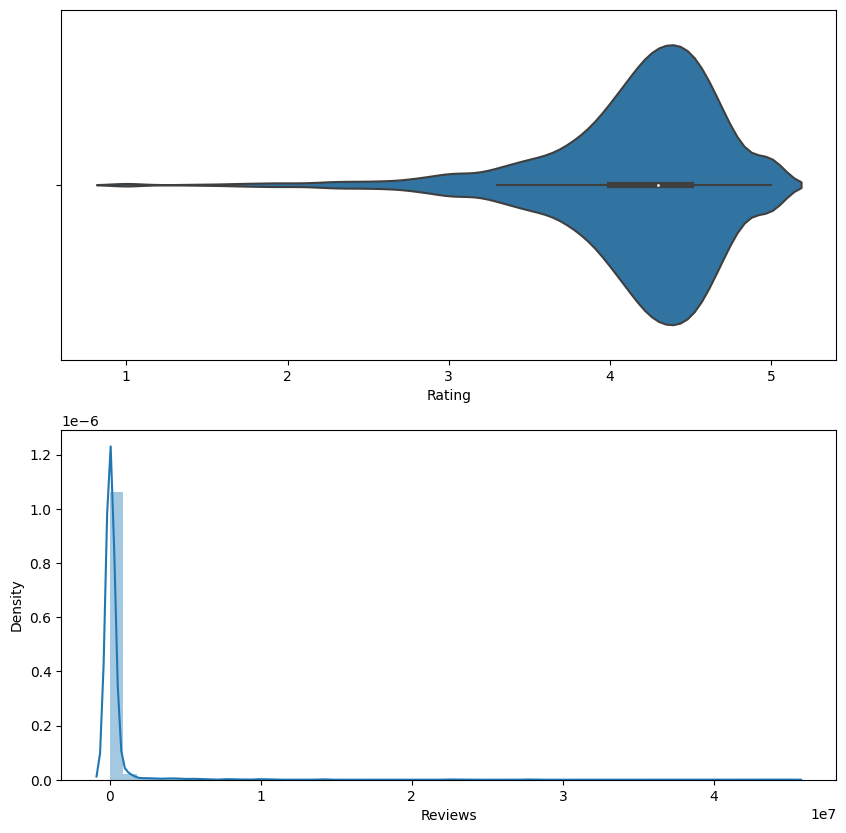

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=df['Rating'])
sns.distplot(df['Reviews'], ax=ax[1])

<Axes: xlabel='Rating', ylabel='Reviews'>

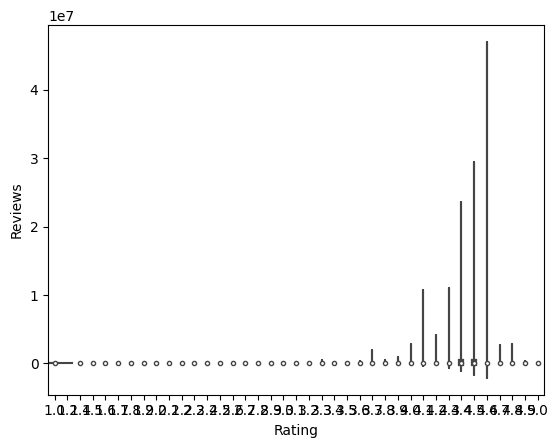

In [34]:
# Распределение параметра Y сгруппированные по Rating.
sns.violinplot(x='Rating', y='Reviews', data=df)

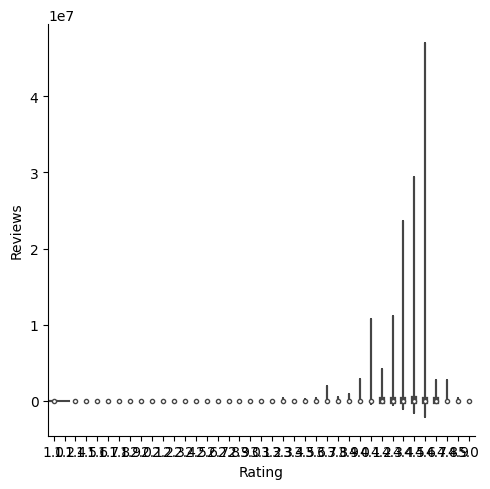

In [35]:
sns.catplot(y='Reviews', x='Rating', data=df, kind="violin", split=True)

In [39]:
df.corr(numeric_only=True)

,Rating,Reviews,Size,Installs,Type,Price
Rating,1.000000,0.080458,-0.019917,0.054362,NaN,-0.021924
Reviews,0.080458,1.000000,0.034872,0.632042,NaN,-0.010012
Size,-0.019917,0.034872,1.000000,0.016490,NaN,0.018735
Installs,0.054362,0.632042,0.016490,1.000000,NaN,-0.010621
Type,NaN,NaN,NaN,NaN,NaN,NaN
Price,-0.021924,-0.010012,0.018735,-0.010621,NaN,1.000000


In [40]:
from scipy import stats
res = stats.spearmanr(df)
res.correlation
res.pvalue

c:\Users\mesou\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\mesou\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([[0.00000000e+000, 2.09640413e-001, 4.01232833e-002,
        6.27838637e-053, 8.61763859e-011, 4.49130497e-051,
                    nan, 1.78709725e-001, 1.98540158e-004,
        9.38732076e-002],
       [2.09640413e-001, 0.00000000e+000, 3.95928056e-004,
        3.67127776e-002, 3.45840477e-020, 3.79377753e-003,
                    nan, 6.08261518e-002, 4.20285311e-028,
        0.00000000e+000],
       [4.01232833e-002, 3.95928056e-004, 0.00000000e+000,
        2.75936876e-022, 8.71414480e-002, 2.37793892e-002,
                    nan, 4.99382412e-007, 6.30089802e-001,
        6.24204281e-006],
       [6.27838637e-053, 3.67127776e-002, 2.75936876e-022,
        0.00000000e+000, 1.13040242e-174, 0.00000000e+000,
                    nan, 3.38081694e-048, 1.86907426e-060,
        4.10529347e-001],
       [8.61763859e-011, 3.45840477e-020, 8.71414480e-002,
        1.13040242e-174, 0.00000000e+000, 2.81323623e-148,
                    nan, 9.25643417e-001, 1.04194316e-054,
        4.0

<Axes: >

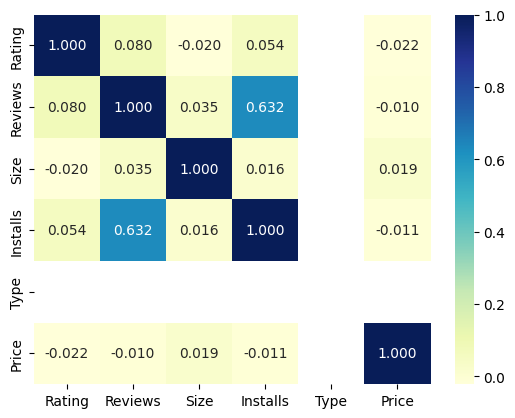

In [44]:
# Метод Пирсона
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.3f', cmap='YlGnBu',)

<Axes: >

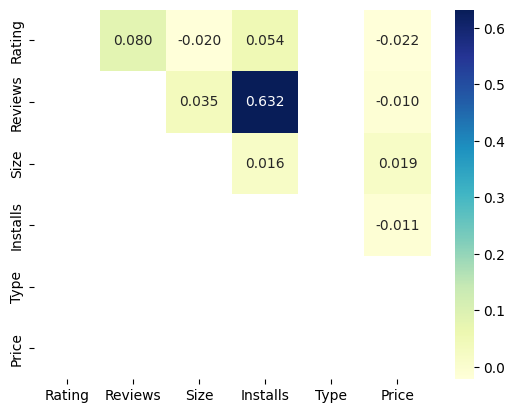

In [48]:
# Треугольный вариант матрицы
mask = np.zeros_like(df.corr(numeric_only=True), dtype=bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(df.corr(numeric_only=True), mask=mask, annot=True, fmt='.3f', cmap='YlGnBu')

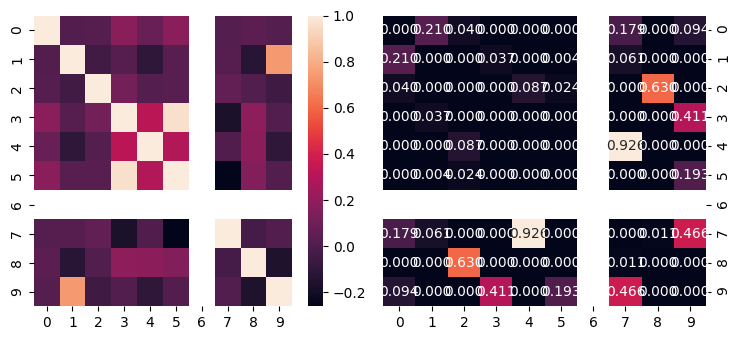

In [49]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)

sns.heatmap(res.correlation, ax=ax1, )
sns.heatmap(res.pvalue, ax=ax2, cbar=False, annot=True, fmt='.3f')
ax2.yaxis.tick_right()

fig.subplots_adjust(wspace=0.1)
plt.show()